# Explore here

In [100]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [101]:
#download data to csv 
url = 'https://storage.googleapis.com/breathecode/project-files/bank-marketing-campaign-data.csv'
pd.read_csv(url, sep= ";", encoding= "utf-8", quotechar='"').to_csv('../data/raw/bank-marketing-campaign-data.csv', index=False)

In [102]:
df = pd.read_csv("../data/raw/bank-marketing-campaign-data.csv")

In [103]:

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

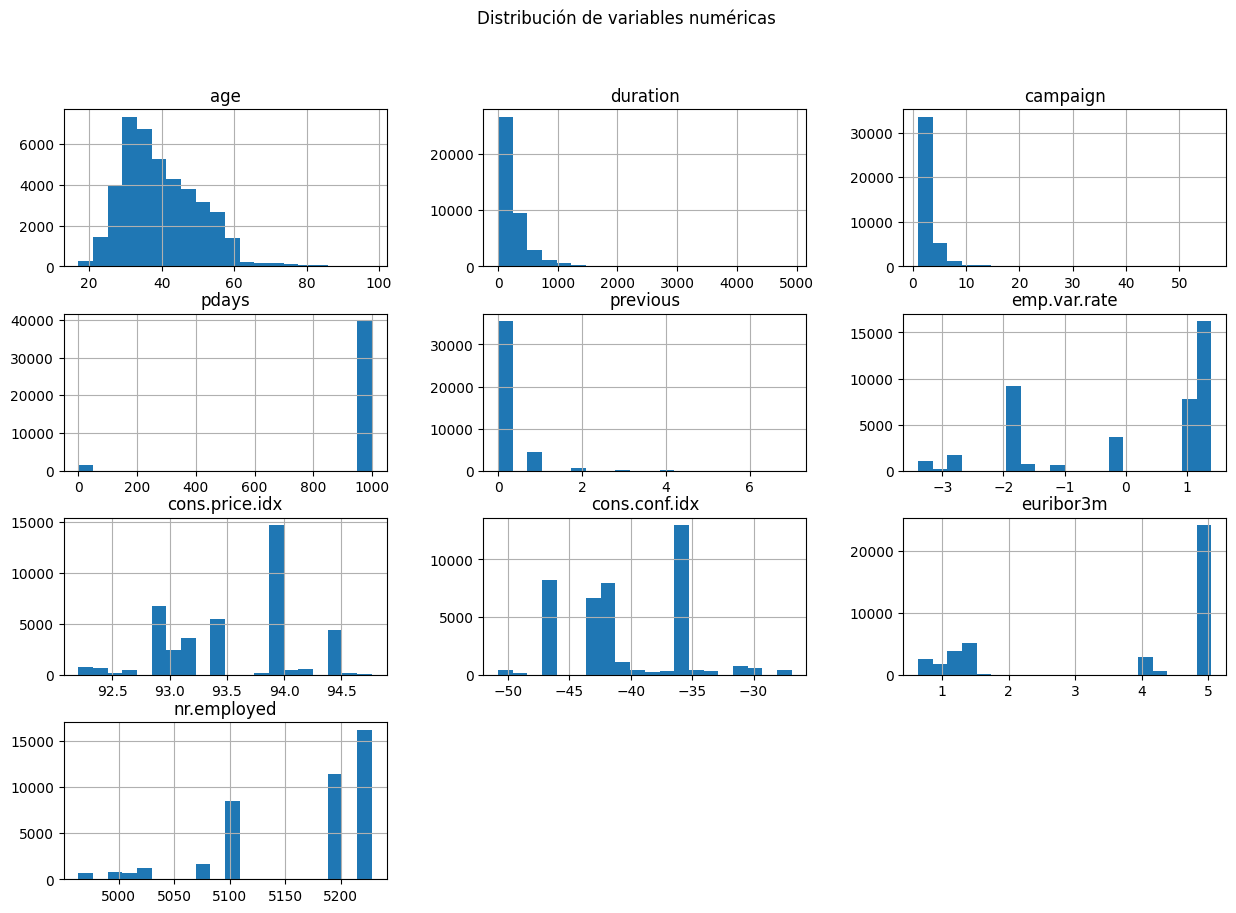

In [105]:
# Aislar variantes numericas y ver distribucion
num_cols = df.select_dtypes(include='number').columns
df[num_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribución de variables numéricas')
plt.show()


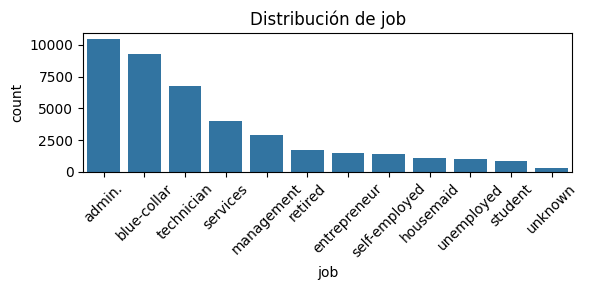

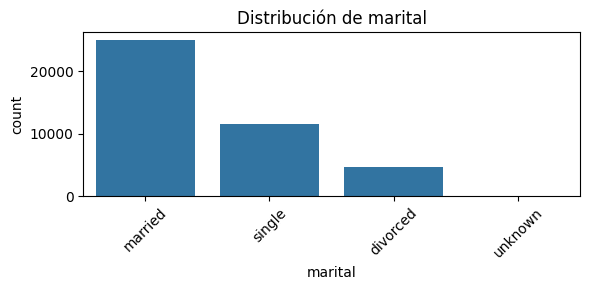

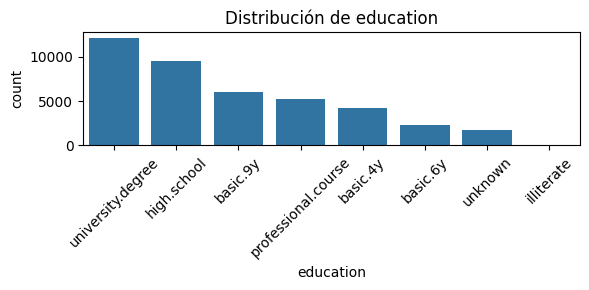

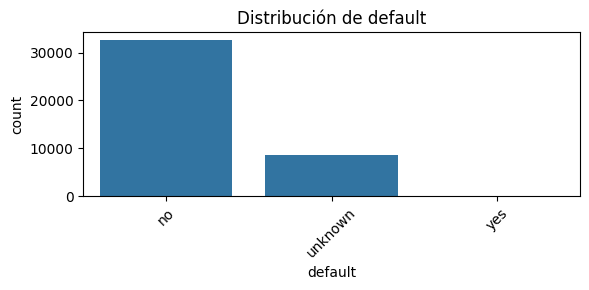

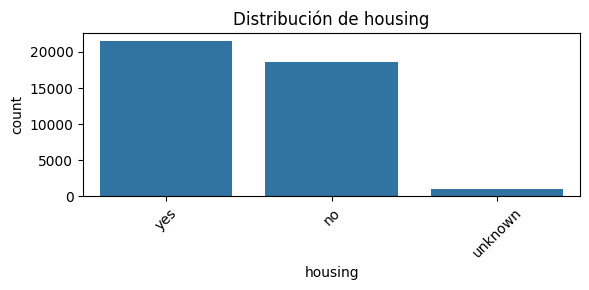

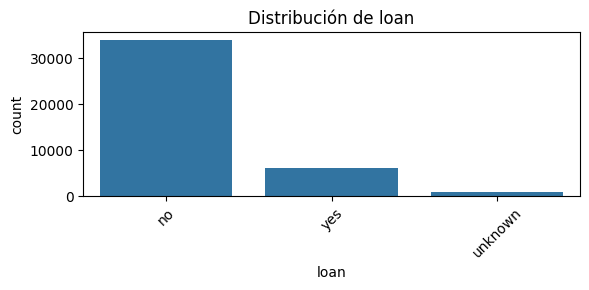

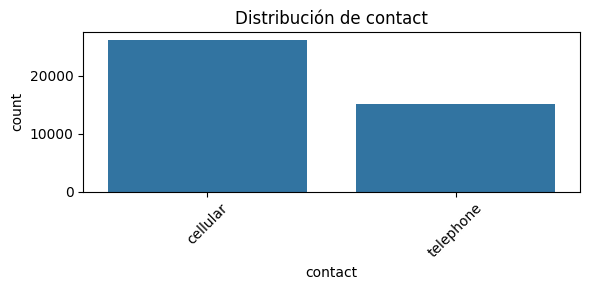

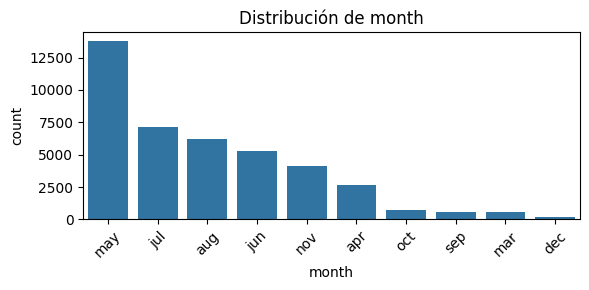

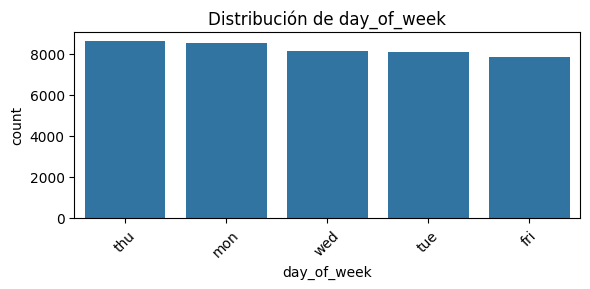

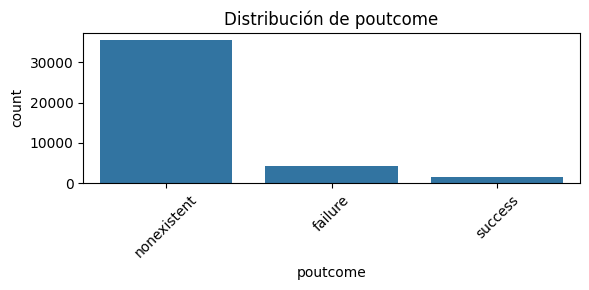

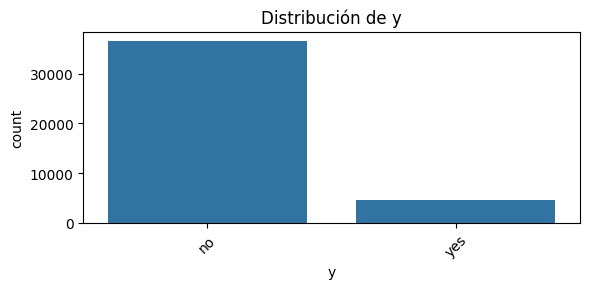

In [106]:
#Aislar variantes categoricas y ver distribucion
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


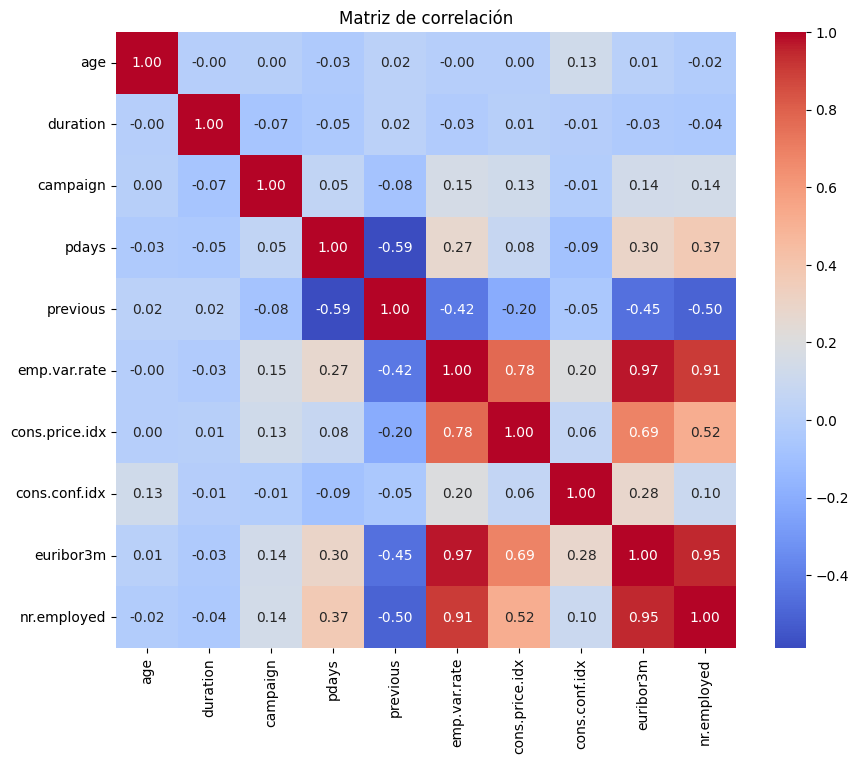

In [107]:
corr = df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

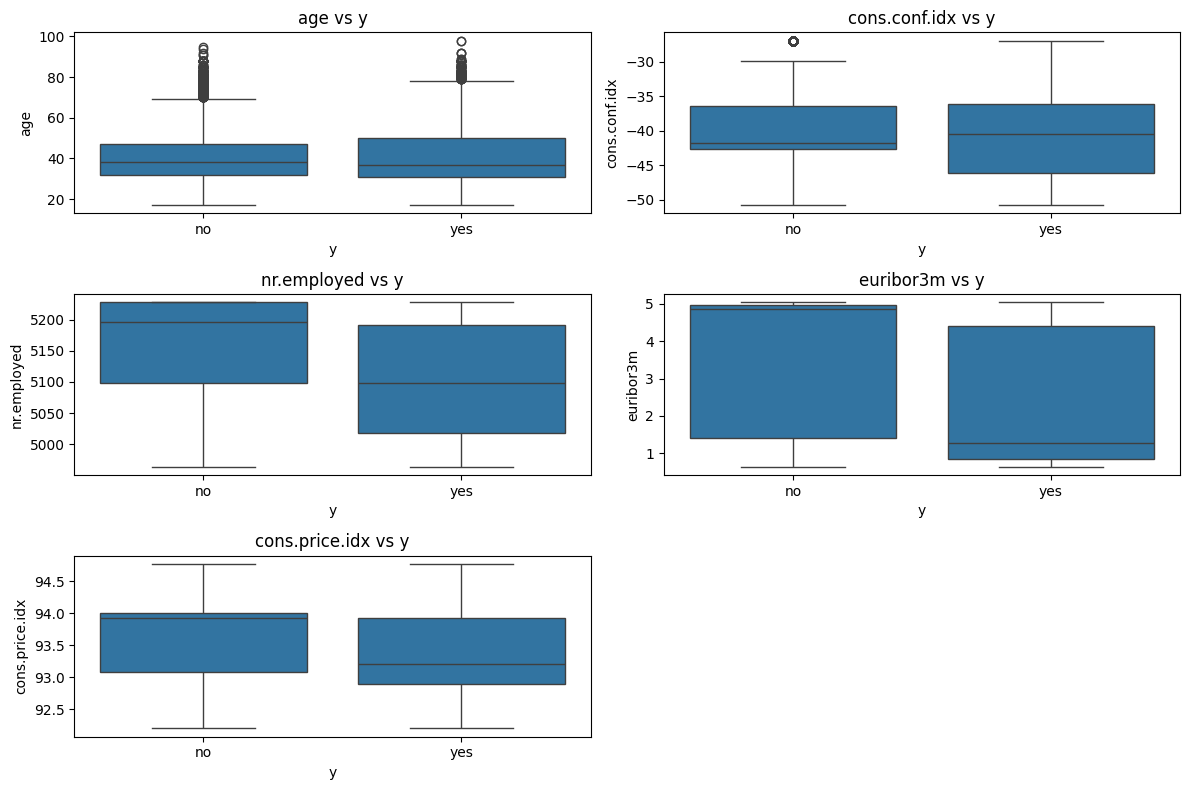

In [108]:
# Seleccionamos algunas variables numéricas
variables = ['age', 'cons.conf.idx', 'nr.employed', 'euribor3m', 'cons.price.idx'] 


fig, axes = plt.subplots(3, 2, figsize=(12, 8)) 
axes = axes.flatten()


for i, col in enumerate(variables):
    sns.boxplot(data=df, x='y', y=col, ax=axes[i])
    axes[i].set_title(f'{col} vs y')
    
if len(variables) < len(axes):
    for j in range(len(variables), len(axes)):
        fig.delaxes(axes[j])
plt.tight_layout()
plt.show()


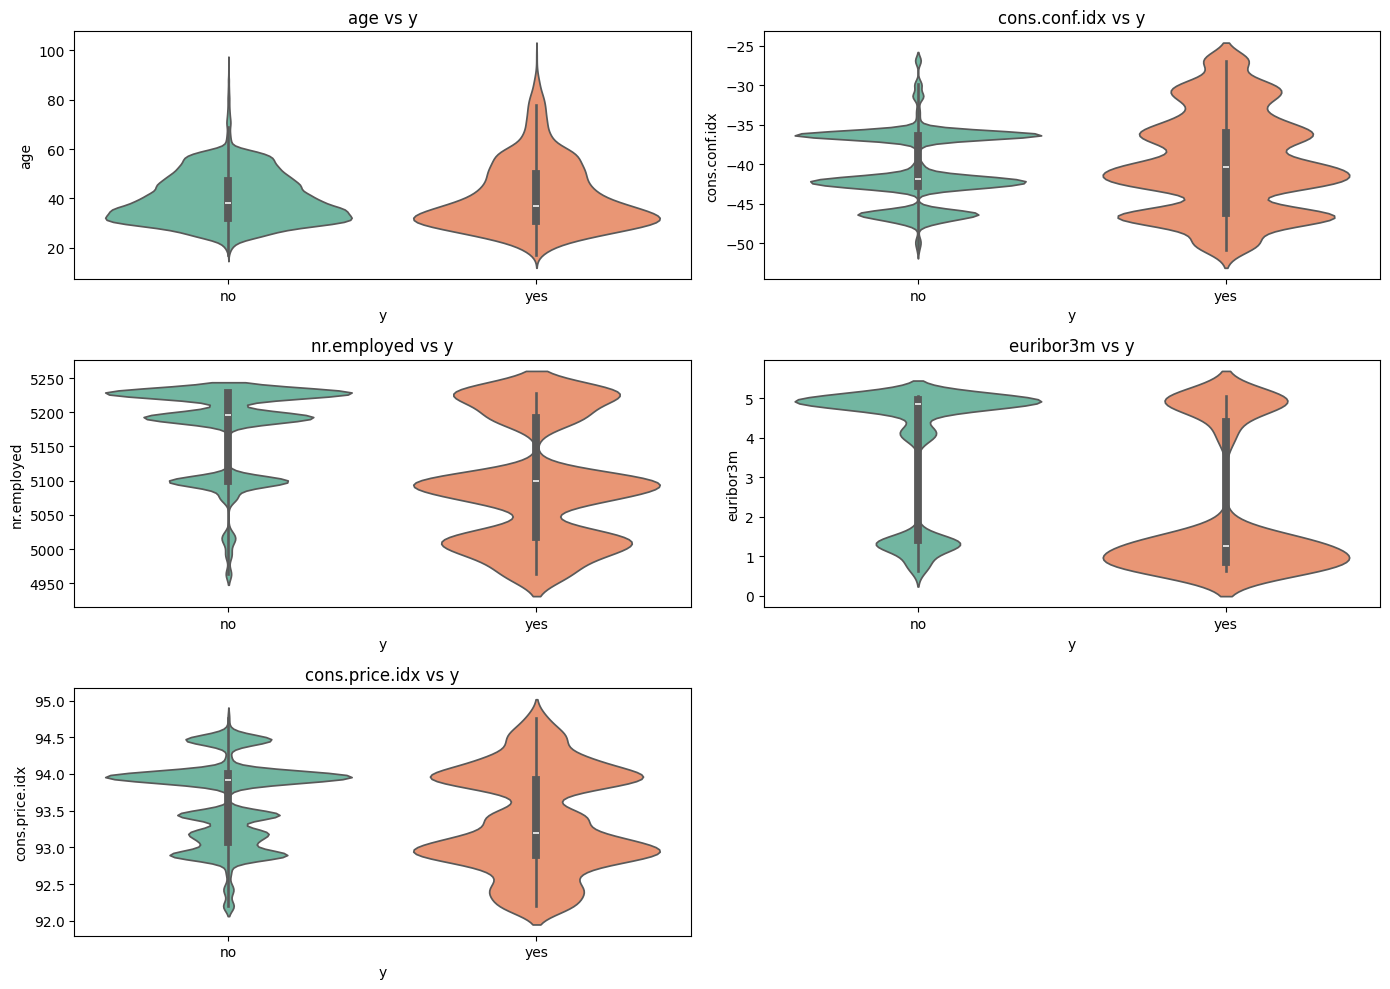

In [109]:

fig, axes = plt.subplots(3, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(variables):
    sns.violinplot(data=df, x='y', y=col, hue='y', ax=axes[i], palette='Set2', legend=False)
    axes[i].set_title(f'{col} vs y')
    axes[i].set_xlabel('y')
    axes[i].set_ylabel(col)


if len(variables) < len(axes):
    for j in range(len(variables), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


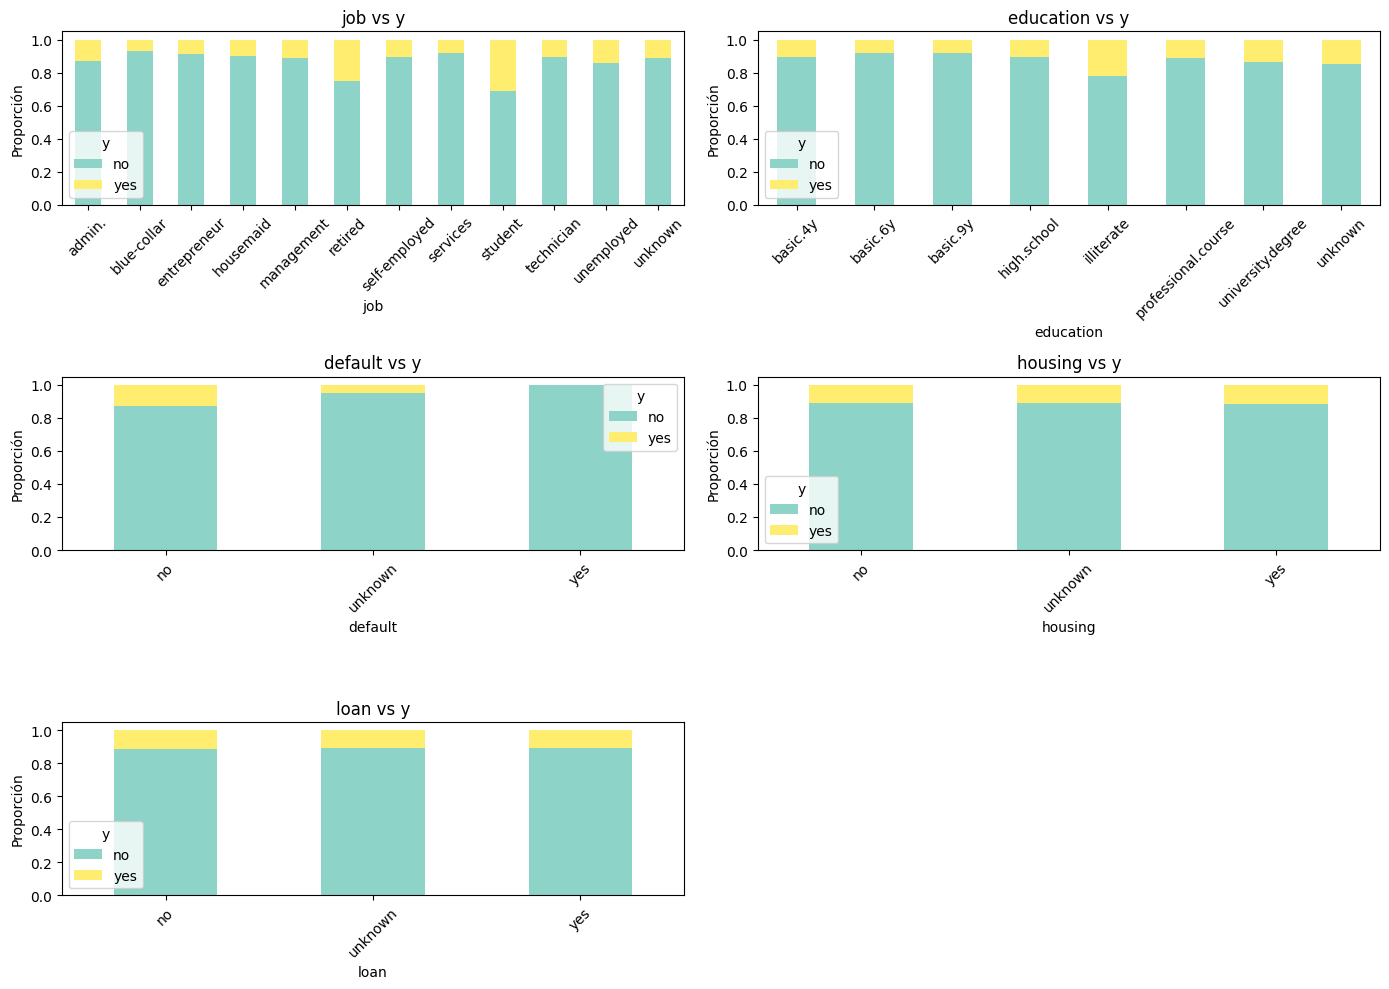

In [110]:
variables_cat = ['job', 'education', 'default', 'housing', 'loan']

fig, axes = plt.subplots(3, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(variables_cat):
    ct = pd.crosstab(df[col], df['y'], normalize='index')
    ct.plot(kind='bar', stacked=True, ax=axes[i], colormap='Set3')
    axes[i].set_title(f'{col} vs y')
    axes[i].set_ylabel('Proporción')
    axes[i].legend(title='y')
    axes[i].tick_params(axis='x', rotation=45)

# para ocultar el subplot vacío
if len(variables_cat) < len(axes):
    for j in range(len(variables_cat), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Conclusión EDA
Variables con mayor poder discriminante visual: nr.employed, euribor3m, y cons.conf.idx.

Variables con menor separación: age y cons.price.idx, aunque podrían seguir siendo útiles en combinación.

In [111]:
#codificar
df_encoded = pd.get_dummies(df, drop_first=True)


In [112]:

X = df_encoded.drop('y_yes', axis=1)  
y = df_encoded['y_yes']              

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [114]:
model = LogisticRegression()
model.fit(X_train, y_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [115]:
y_pred = model.predict(X_test)
y_pred

array([False, False, False, ..., False, False, False], shape=(12357,))

In [116]:
model.predict_proba(X_test)

array([[0.99001588, 0.00998412],
       [0.98860668, 0.01139332],
       [0.95271153, 0.04728847],
       ...,
       [0.99059027, 0.00940973],
       [0.80919775, 0.19080225],
       [0.98763481, 0.01236519]], shape=(12357, 2))

In [117]:
accuracy_score(y_test, y_pred)

0.910091446143886

In [118]:
bank_cm = confusion_matrix(y_test, y_pred)
bank_cm

array([[10699,   266],
       [  845,   547]])

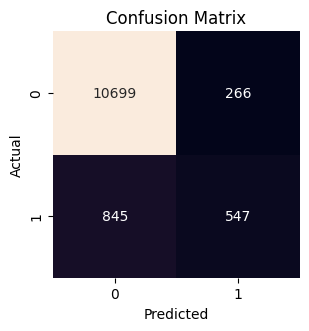

In [119]:
cm_df = pd.DataFrame(bank_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()